In [1]:
import tensorflow as tf

In [2]:
from keras.datasets import imdb

In [3]:
from keras import layers, models, losses, optimizers

In [4]:
from keras.utils import pad_sequences

In [5]:
vocab_size = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

In [6]:
reviewLengths = [len(x) for x in X_train]

In [7]:
import matplotlib.pyplot as plt

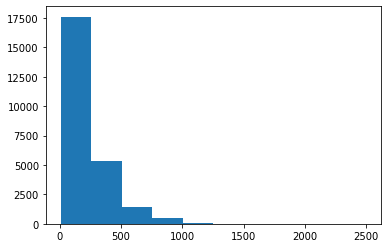

In [19]:
plt.hist(reviewLengths, bins=10)
plt.show()

In [20]:
max_length = 500  # This value should be chosen based on your data. 
                  # It looks like you intended 500 since you used input_length=500 in your Embedding layer.

X_train = pad_sequences(X_train, maxlen=max_length)
X_test = pad_sequences(X_test, maxlen=max_length)

Build a LSTM network

In [21]:
tf.random.set_seed(42)

In [22]:
model = models.Sequential()

In [23]:
embeddingSize = 32

In [24]:
model.add(layers.Embedding(vocab_size, embeddingSize, input_length=500))

In [25]:
model.add(layers.LSTM(50))

In [26]:
model.add(layers.Dense(1, activation='sigmoid'))

In [27]:
model.compile(loss=losses.binary_crossentropy, optimizer=optimizers.RMSprop(lr=0.001), metrics=['accuracy'])

c:\Python310\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [28]:
model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/10
196/196 [==============================] - 83s 415ms/step - loss: 0.4788 - accuracy: 0.7796 - val_loss: 0.3233 - val_accuracy: 0.8715
Epoch 2/10
196/196 [==============================] - 114s 581ms/step - loss: 0.3036 - accuracy: 0.8798 - val_loss: 0.3583 - val_accuracy: 0.8462
Epoch 3/10
196/196 [==============================] - 115s 590ms/step - loss: 0.2672 - accuracy: 0.8962 - val_loss: 0.6223 - val_accuracy: 0.7956
Epoch 4/10
196/196 [==============================] - 115s 588ms/step - loss: 0.2470 - accuracy: 0.9050 - val_loss: 0.2925 - val_accuracy: 0.8778
Epoch 5/10
196/196 [==============================] - 134s 685ms/step - loss: 0.2266 - accuracy: 0.9123 - val_loss: 0.3198 - val_accuracy: 0.8730
Epoch 6/10
196/196 [==============================] - 118s 602ms/step - loss: 0.2159 - accuracy: 0.9164 - val_loss: 0.2974 - val_accuracy: 0.8785
Epoch 7/10
196/196 [==============================] - 122s 624ms/step - loss: 0.2026 - accuracy: 0.9236 - val_loss: 0.4598 - 